# Comparison of different sampling methods

In [1]:
## Import reqired modules
using Plots
using Statistics

## Import custom block bootstrap functions
include("../test/getTestData.jl");
include("../src/bootstrapSampling.jl");
include("../src/bootstrapStatistic.jl");

In [2]:
## Import test data
dataLength = 500;
testData = getTestDataPrimeInts(dataLength);

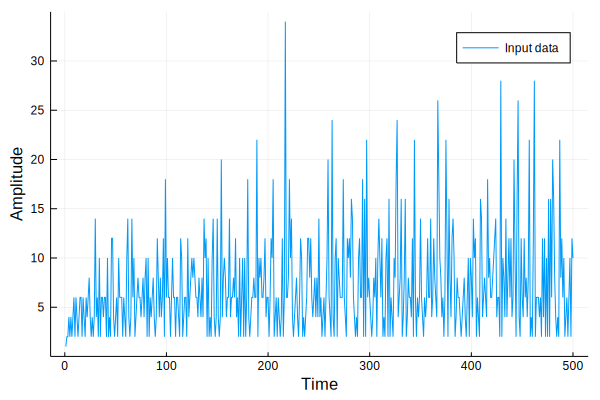

In [3]:
## Plot input data
plt1 = plot(testData, label = "Input data");
xlabel!("Time")
ylabel!("Amplitude")
display(plt1);

## Overall settings

In [4]:
statisticHandle = std;
blockLength = 50;
NbootstrapReplicates = 200;

## Moving block bootstrap

In [5]:
## Bootstrap Statistic
bootstrapSampleHandle = MBBsample;
fullDataEstimate, replicateEstimate, resampleIndexBB, resampleDataBB = bootstrapStatistic(
    testData, statisticHandle, bootstrapSampleHandle, blockLength, NbootstrapReplicates);
stdMBB = std(replicateEstimate);

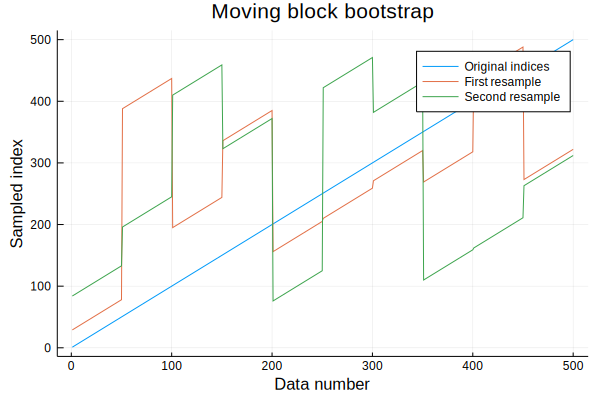

In [6]:
## Plot resampling indices
plt2 = plot(1:dataLength, label = "Original indices");
plot!(resampleIndexBB[1], label = "First resample");
plot!(resampleIndexBB[2], label = "Second resample");
title!("Moving block bootstrap")
xlabel!("Data number")
ylabel!("Sampled index")
display(plt2);

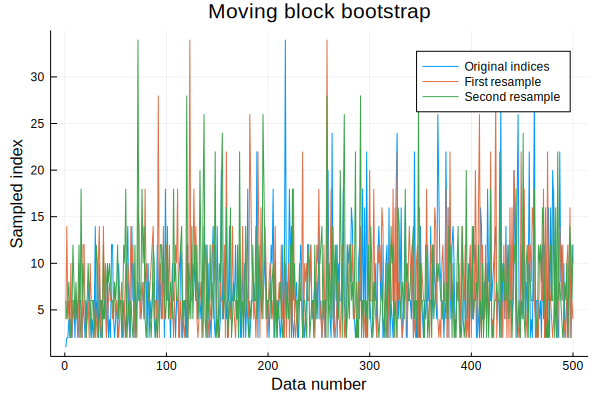

In [7]:
## Plot resampling indices
plt3 = plot(testData, label = "Original indices");
plot!(resampleDataBB[1], label = "First resample");
plot!(resampleDataBB[2], label = "Second resample");
title!("Moving block bootstrap")
xlabel!("Data number")
ylabel!("Sampled index")
display(plt3);

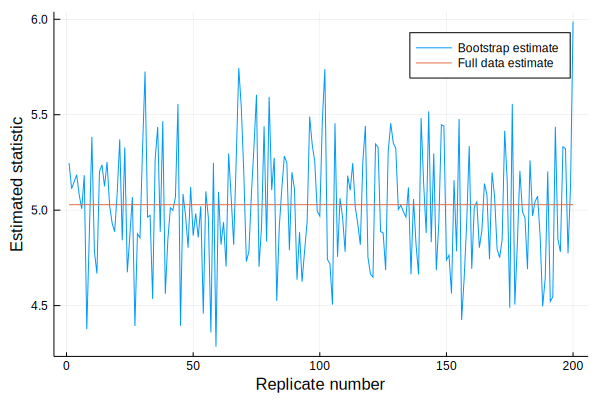

In [8]:
## Plot statistics results
plt4 = plot(replicateEstimate, label = "Bootstrap estimate");
plot!(fullDataEstimate*ones(size(replicateEstimate)), label = "Full data estimate");
xlabel!("Replicate number")
ylabel!("Estimated statistic")
display(plt4);

## Non-overlapping block bootstrap

In [9]:
## Bootstrap Statistic
bootstrapSampleHandle = NBBsample;
fullDataEstimate, replicateEstimate, resampleIndexBB, resampleDataBB = bootstrapStatistic(
    testData, statisticHandle, bootstrapSampleHandle, blockLength, NbootstrapReplicates);
stdNBB = std(replicateEstimate);

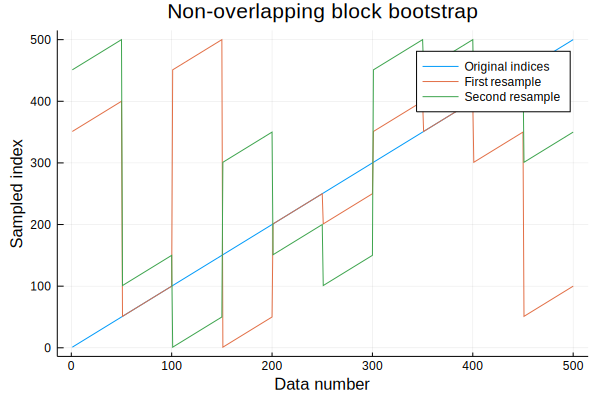

In [10]:
## Plot resampling indices
plt5 = plot(1:dataLength, label = "Original indices");
plot!(resampleIndexBB[1], label = "First resample");
plot!(resampleIndexBB[2], label = "Second resample");
title!("Non-overlapping block bootstrap")
xlabel!("Data number")
ylabel!("Sampled index")
display(plt5);

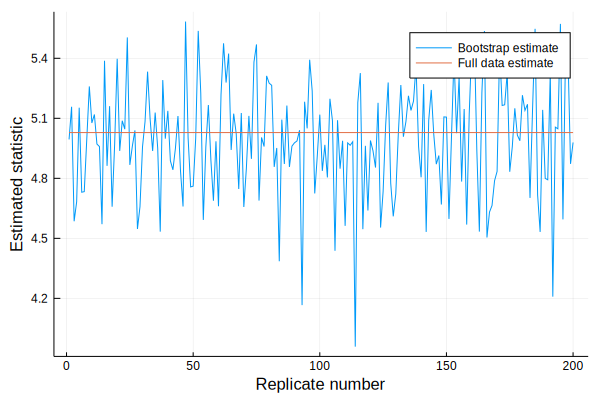

In [11]:
## Plot statistics results
plt6 = plot(replicateEstimate, label = "Bootstrap estimate");
plot!(fullDataEstimate*ones(size(replicateEstimate)), label = "Full data estimate");
xlabel!("Replicate number")
ylabel!("Estimated statistic")
display(plt6);

## Circular block bootstrap

In [12]:
## Bootstrap Statistic
bootstrapSampleHandle = CBBsample;
fullDataEstimate, replicateEstimate, resampleIndexBB, resampleDataBB = bootstrapStatistic(
    testData, statisticHandle, bootstrapSampleHandle, blockLength, NbootstrapReplicates);
stdCBB = std(replicateEstimate);

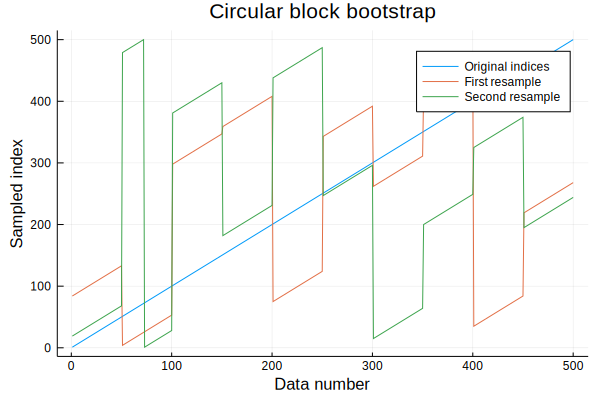

In [13]:
## Plot resampling indices
plt7 = plot(1:dataLength, label = "Original indices");
plot!(resampleIndexBB[1], label = "First resample");
plot!(resampleIndexBB[2], label = "Second resample");
title!("Circular block bootstrap")
xlabel!("Data number")
ylabel!("Sampled index")
display(plt7);

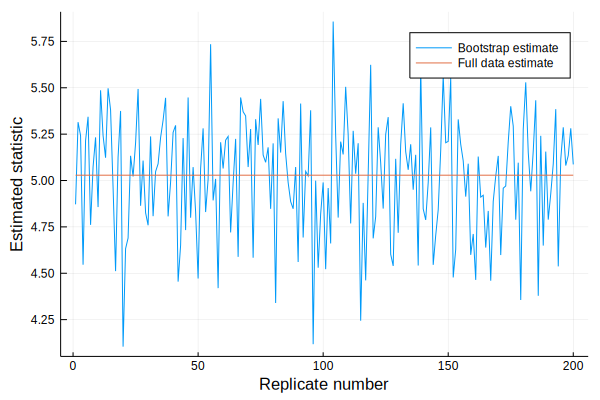

In [14]:
## Plot statistics results
plt8 = plot(replicateEstimate, label = "Bootstrap estimate");
plot!(fullDataEstimate*ones(size(replicateEstimate)), label = "Full data estimate");
xlabel!("Replicate number")
ylabel!("Estimated statistic")
display(plt8);

## Comparing results

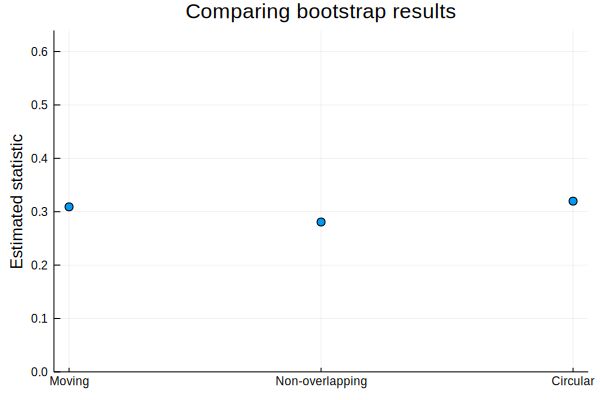

In [15]:
plt9 = scatter(["Moving", "Non-overlapping", "Circular"], [stdMBB, stdNBB, stdCBB], 
    label = "", title = "Comparing bootstrap results")
ylabel!("Estimated statistic")
ylims!(0, 2*maximum([stdMBB, stdNBB, stdCBB]))